In [1]:
# Identity Transformation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import Einstein image
einstein = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)
assert einstein is not None

In [34]:
s_x = np.array([[1, 0, -1], 
                [2, 0, -2], 
                [1, 0, -1]])


s_y = np.array([[1, 2, 1],
                [0, 0, 0], 
                [-1, -2, -1]])

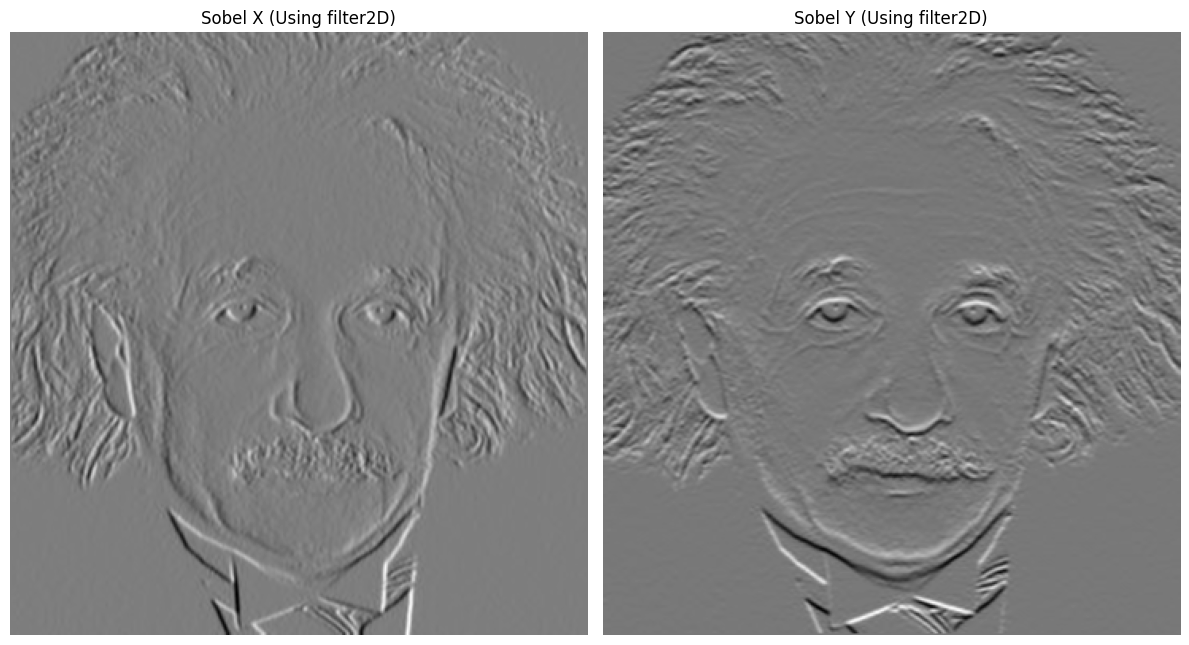

In [35]:
# Apply the Sobel filter in the X direction
im_x= cv.filter2D(einstein, cv.CV_64F, s_x)

# Apply the Sobel filter in the Y direction
im_y = cv.filter2D(einstein, cv.CV_64F, s_y)


fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X (Using filter2D)')
ax[0].axis("off")
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y (Using filter2D)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
def apply_filter(image, filt):
    [rows, cols] = np.shape(image) # Get image size
    kh, kw = filt.shape
    assert kh % 2 == 1 and kw % 2 == 1, "Filter must have odd size."

    ph, pw = kh // 2, kw // 2                 # half sizes
    out = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows - kh + 1):
        for j in range(cols - kw + 1):
            window = image[i:i+kh, j:j+kw]
            out[i + ph, j + pw] = np.sum(window * filt)  # correlation

    return out



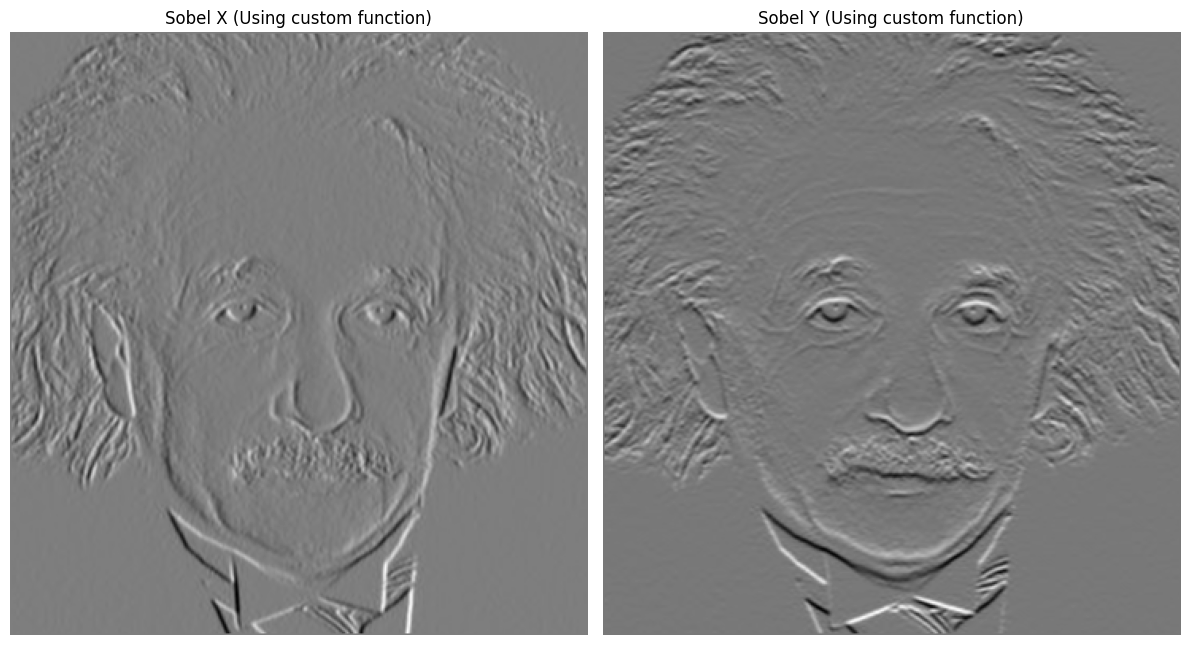

In [29]:
# Apply the Sobel filter in the X and Y directions
sobel_x_filtered = apply_filter(einstein, s_x)
sobel_y_filtered = apply_filter(einstein, s_y)

# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel X (Using custom function)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Y (Using custom function)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [30]:
# Sobel x filter seperated
s_x_vertical = np.array([[1], [2], [1]])
s_x_horizontal = np.array([[1, 0, -1]])

# Sobel y filter seperated
s_y_vertical = np.array([[1], [0], [-1]])
s_y_horizontal = np.array([[1, 2, 1]])

# Apply the vertical and horizontal filters consecutively
x_mid = cv.filter2D(einstein, cv.CV_64F, s_x_horizontal)
x_img = cv.filter2D(x_mid, cv.CV_64F, s_x_vertical)

y_mid = cv.filter2D(einstein, cv.CV_64F, s_y_vertical)
y_img = cv.filter2D(y_mid, cv.CV_64F, s_y_horizontal)

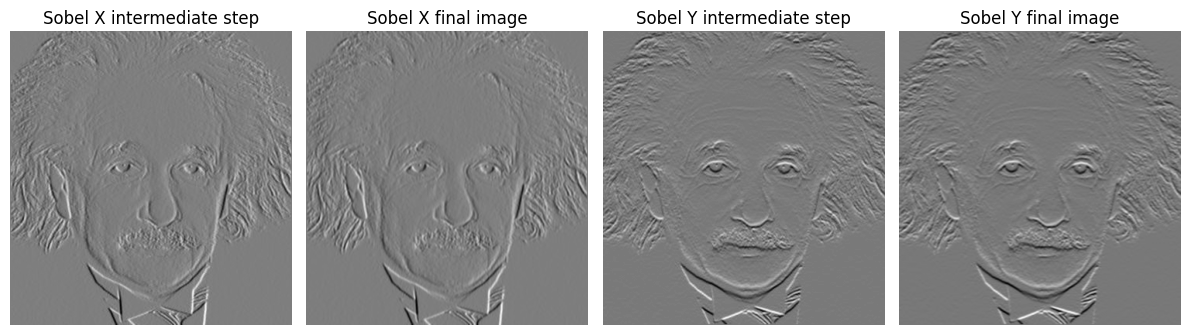

In [32]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 4, figsize=(12, 8))

ax[0].imshow(x_mid, cmap='gray')
ax[0].set_title('Sobel X intermediate step')
ax[0].axis("off")

ax[1].imshow(x_img, cmap='gray')
ax[1].set_title('Sobel X final image')
ax[1].axis("off")

ax[2].imshow(y_mid, cmap='gray')
ax[2].set_title('Sobel Y intermediate step')
ax[2].axis("off")

ax[3].imshow(y_img, cmap='gray')
ax[3].set_title('Sobel Y final image')
ax[3].axis("off")

plt.tight_layout()
plt.show()